In [2]:
from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt
import numpy as np

In [6]:
%matplotlib ipympl

In [4]:
specz_photoz = Table.read('../../catalogs/SpecZ_match.csv')
zout = Table.read('../../catalogs/g165_444w_astropy.eazypy.zout.fits')

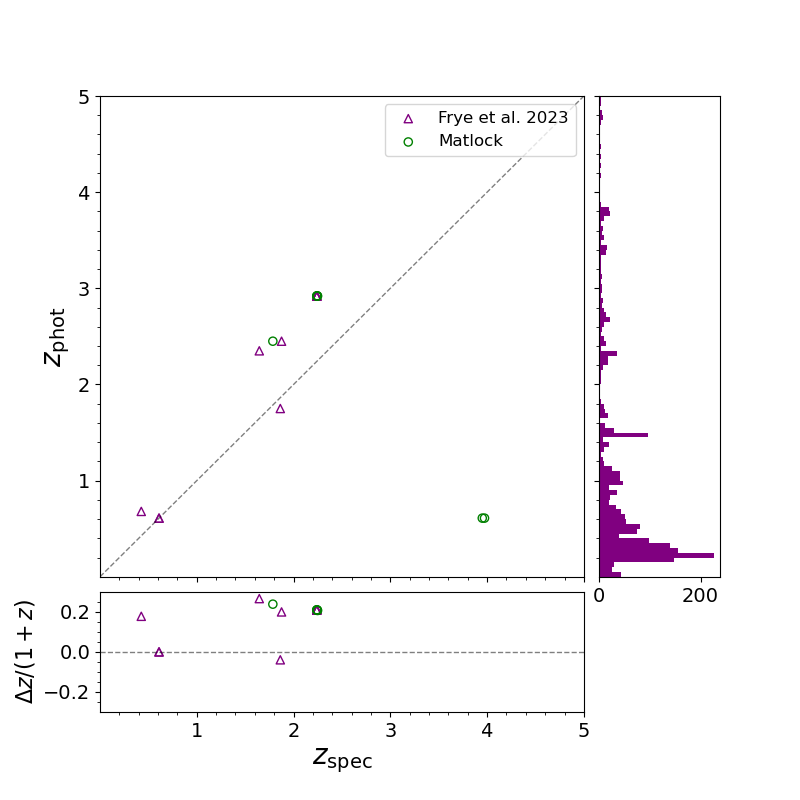

AttributeError: 'NoneType' object has no attribute 'canvas'

In [7]:
MIN = 0.0001
MAX = 5
MARKER_SIZE = 35

fig = plt.figure(figsize=(8,8), dpi=100)

gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(4, 1), wspace=0.05, hspace=0.05)
ax3 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0], sharex=ax3)
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)

ax1.tick_params(labelbottom=False)
ax2.tick_params(labelleft=False)

# make grid
# ax1.grid()
# ax3.grid()

# make ticks smaller
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

# add minor ticks
ax1.minorticks_on()
ax3.minorticks_on()

# decrease whitespace between subplots
plt.subplots_adjust(hspace=0.05)

ax1.scatter(specz_photoz['Frye2023'], specz_photoz['Photoz'], MARKER_SIZE, marker='^', color='purple', facecolors='none', label='Frye et al. 2023')
ax1.scatter(specz_photoz['REDSHIFT'], specz_photoz['Photoz'], MARKER_SIZE, marker='o', color='green', facecolors='none', label='Matlock')

# Plot 1:1 line
ax1.plot([MIN, MAX], [MIN, MAX], color='k', linestyle='--', linewidth=1, alpha=0.5)

# make delta z / (1+z) plot
ax3.scatter(specz_photoz['Frye2023'], (specz_photoz['Photoz'] - specz_photoz['Frye2023']) / (1 + specz_photoz['Frye2023']), MARKER_SIZE, marker='^', color='purple', facecolors='none')
ax3.scatter(specz_photoz['REDSHIFT'], (specz_photoz['Photoz'] - specz_photoz['REDSHIFT']) / (1 + specz_photoz['REDSHIFT']), MARKER_SIZE, marker='o', color='green', facecolors='none')

# dashed lines at 0, -0.15 and 0.15
ax3.plot([MIN, MAX], [0, 0], color='k', linestyle='--', linewidth=1, alpha=0.5)
# ax3.plot([MIN, MAX], [-0.15, -0.15], color='red', linestyle='--', linewidth=1)
# ax3.plot([MIN, MAX], [0.15, 0.15], color='red', linestyle='--', linewidth=1)

# histogram of z
ax2.hist(zout['z_phot'], bins=100, orientation='horizontal', color='purple', histtype='stepfilled', linewidth=1, range=(MIN, MAX))
# ax2.hist(massi['zb'], bins=50, orientation='horizontal', color='green', histtype='stepfilled', linewidth=1, range=(MIN, MAX))

# vertical lines at 0.3, 1.8
# ax2.axhline(y=0.3, color='k', linestyle='--', linewidth=1, alpha=1)
# ax2.axhline(y=1.78, color='k', linestyle='--', linewidth=1, alpha=1)
# ax2.axhline(y=2.24, color='k', linestyle='--', linewidth=1, alpha=1)

# limit to +/- 3 sigma
ax3.set_ylim(-0.3, 0.3)

ax1.set_xlim(MIN, MAX)
ax1.set_ylim(MIN, MAX)

ax1.set_ylabel(r'$z_{\rm{phot}}$', fontsize=20)
ax3.set_xlabel(r'$z_{\rm{spec}}$', fontsize=20)
ax3.set_ylabel(r'$\Delta z / (1+z)$', fontsize=16)

# add legend
ax1.legend(loc='upper right', frameon=True, fontsize=12)

# save figure
plt.savefig('specz_photoz.pdf', bbox_inches='tight')

import mplcursors
mplcursors.cursor(hover=mplcursors.HoverMode.Transient)

plt.show()